# Projecting Life Expectancy

Source of historical data:	PSA
    
Source of forecast:	PSA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-q007avd5 because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df_life_expectancy = pd.read_csv('~/cpt5/capstone/data/processed/life_expectancy_clean_v3.csv')             
                   

In [3]:
df_life_expectancy.head()

,Unnamed: 0,year,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
0,0,2010,71.019294,68.492383,71.515762,69.240025,70.829473,70.700775,69.166488,68.554212,69.688459,70.017242,67.372968,67.342479,67.940863,67.710243,68.324052,66.539906,59.936557
1,1,2011,71.259294,68.792383,71.755762,69.540025,71.069473,70.970814,69.466488,68.854212,69.958938,70.287615,67.724395,67.693422,68.240863,68.058966,68.624052,66.939906,60.436557
2,2,2012,71.499294,69.092383,71.995762,69.840025,71.309473,71.240852,69.766488,69.154212,70.229416,70.557987,68.075821,68.044365,68.540863,68.407690,68.924052,67.339906,60.936557
3,3,2013,71.739294,69.392383,72.235762,70.140025,71.549473,71.510890,70.066488,69.454212,70.499895,70.828359,68.427248,68.395308,68.840863,68.756414,69.224052,67.739906,61.436557
4,4,2014,71.979294,69.692383,72.475762,70.440025,71.789473,71.780928,70.366488,69.754212,70.770374,71.098731,68.778674,68.746251,69.140863,69.105137,69.524052,68.139906,61.936557


In [6]:
df_life_expectancy.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df_life_expectancy.columns

Index(['year', 'NCR', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol', 'VI - W. Visayas',
       'VII - C. Visayas', 'VIII - E. Visayas', 'IX - Zamboanga',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN', 'XIII - Caraga',
       'BARMM'],
      dtype='object')

In [9]:
df_life_expectancy.head()

,year,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
0,2010,71.019294,68.492383,71.515762,69.240025,70.829473,70.700775,69.166488,68.554212,69.688459,70.017242,67.372968,67.342479,67.940863,67.710243,68.324052,66.539906,59.936557
1,2011,71.259294,68.792383,71.755762,69.540025,71.069473,70.970814,69.466488,68.854212,69.958938,70.287615,67.724395,67.693422,68.240863,68.058966,68.624052,66.939906,60.436557
2,2012,71.499294,69.092383,71.995762,69.840025,71.309473,71.240852,69.766488,69.154212,70.229416,70.557987,68.075821,68.044365,68.540863,68.407690,68.924052,67.339906,60.936557
3,2013,71.739294,69.392383,72.235762,70.140025,71.549473,71.510890,70.066488,69.454212,70.499895,70.828359,68.427248,68.395308,68.840863,68.756414,69.224052,67.739906,61.436557
4,2014,71.979294,69.692383,72.475762,70.440025,71.789473,71.780928,70.366488,69.754212,70.770374,71.098731,68.778674,68.746251,69.140863,69.105137,69.524052,68.139906,61.936557


In [11]:
df_life_expectancy.columns

Index(['year', 'NCR', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol', 'VI - W. Visayas',
       'VII - C. Visayas', 'VIII - E. Visayas', 'IX - Zamboanga',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN', 'XIII - Caraga',
       'BARMM'],
      dtype='object')

In [13]:
regions = ['NCR', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol', 'VI - W. Visayas',
       'VII - C. Visayas', 'VIII - E. Visayas', 'IX - Zamboanga',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN', 'XIII - Caraga',
       'BARMM']


df_life_expectancy = df_life_expectancy.melt(id_vars='year',
                                                value_vars = regions)
df_life_expectancy.columns = ['year', 'Region', 'life_expectancy']


In [14]:
df_life_expectancy.head()

,year,Region,life_expectancy
0,2010,NCR,71.019294
1,2011,NCR,71.259294
2,2012,NCR,71.499294
3,2013,NCR,71.739294
4,2014,NCR,71.979294


In [15]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'orangered', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']

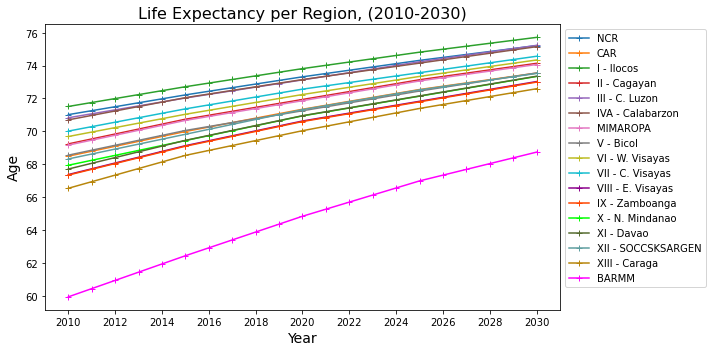

In [17]:
plt.figure(figsize=(10,5))
for i,j in enumerate(regions):
    df = df_life_expectancy[df_life_expectancy['Region'] == j]
    plt.plot(df['year'], df['life_expectancy'],'+-', label=j, color=colors[i])
    
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.yticks(np.arange(60,78, 2))
plt.title('Life Expectancy per Region, (2010-2030)',
          fontsize=16)

plt.ylabel('Age', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('life_expectancy.png', dpi=300);

In [19]:
df_life_expectancy[df_life_expectancy['year'] == 2030].sort_values(by='life_expectancy')

,year,Region,life_expectancy
356,2030,BARMM,68.738130
335,2030,XIII - Caraga,72.594117
251,2030,IX - Zamboanga,72.997194
230,2030,VIII - E. Visayas,73.030101
272,2030,X - N. Mindanao,73.340863
293,2030,XI - Davao,73.353861
314,2030,XII - SOCCSKSARGEN,73.524052
41,2030,CAR,73.545322
167,2030,V - Bicol,73.552374
146,2030,MIMAROPA,74.066488


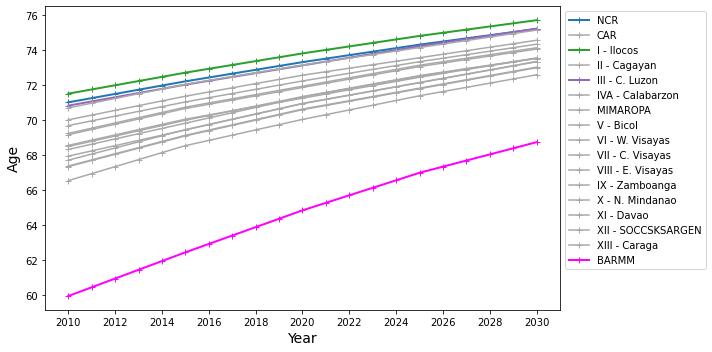

In [22]:
plt.figure(figsize=(10,5))
for i,j in enumerate(regions):
    df = df_life_expectancy[df_life_expectancy['Region'] == j]
    
    if j in ['BARMM', 'NCR', "III - C. Luzon", "I - Ilocos"]:
        plt.plot(df['year'], df['life_expectancy'],'+-', label=j, color=colors[i], lw=2)
    else:
        plt.plot(df['year'], df['life_expectancy'],'+-', label=j, color='darkgrey')
        
        
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.yticks(np.arange(60,78, 2))

plt.ylabel('Age', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('PPT_life_expectancy.png', dpi=300);

In [23]:
df_life_expectancy.to_csv('../data/processed/life_expectancy_clean.csv')